# Welcome to the PyGraphML Documentation

PyGraphML is a Python library designed to parse GraphML file.

## Overview

### GraphML

[`GraphML`](http://graphml.graphdrawing.org/) is a comprehensive and easy-to-use file format for graphs. It consists of a language core to describe the structural properties of a graph and a flexible extension mechanism to add application-specific data. Its main features include support of:

- directed, undirected, and mixed graphs,
- hypergraphs,
- hierarchical graphs,
- graphical representations,
- references to external data,
- application-specific attribute data, and light-weight parsers.

Unlike many other file formats for graphs, GraphML does not use a
custom syntax. Instead, it is based on XML and hence ideally suited as
a common denominator for all kinds of services generating, archiving,
or processing graphs.

**Note**: Above description is coming from GraphML official website: http://graphml.graphdrawing.org/.

### PyGraphML

PyGraphML is a small library designed to parse GraphML files. This
library has been written in Python. It's main feature are:

- reading GraphML file and getting consistant graph accessible in Python.
- write a graph object to a GraphML file.
- flexible attributes management.
- graph visualization using [`NetworkX`](https://github.com/hadim/pygraphml)

In [1]:
%matplotlib inline

import tempfile
import os
import sys

sys.path.append("../")

from pygraphml import GraphMLParser
from pygraphml import Graph

## Usage

### Create a graph

Let's create a simple graph with 5 nodes and some edges between this nodes:

In [2]:
g = Graph()

n1 = g.add_node("A")
n2 = g.add_node("B")
n3 = g.add_node("C")
n4 = g.add_node("D")
n5 = g.add_node("E")

g.add_edge(n1, n3)
g.add_edge(n2, n3)
g.add_edge(n3, n4)
g.add_edge(n3, n5)

### Graph search

You can use [breadth-first search](http://en.wikipedia.org/wiki/Breadth-first_search>) and [depth-first search](http://en.wikipedia.org/wiki/Depth-first_search>):

In [3]:
# Set a root
g.set_root(n1)

nodes = g.BFS()
for node in nodes:
    print(node)

nodes = g.DFS_prefix()
for node in nodes:
    print(node)

ID: 0
label : A

ID: 2
label : C

ID: 3
label : D

ID: 4
label : E

ID: 0
label : A
depth : 0

ID: 2
label : C
depth : 0

ID: 3
label : D
depth : 0

ID: 4
label : E
depth : 1



### Visualize a graph with NetworkX

If you have `matplotlib` and NetworkX installed, you can visualize the graph. Note that Visualization is very basic and serves only to quickly check if graph is consistent:

/home/hadim/local/conda/envs/pg/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


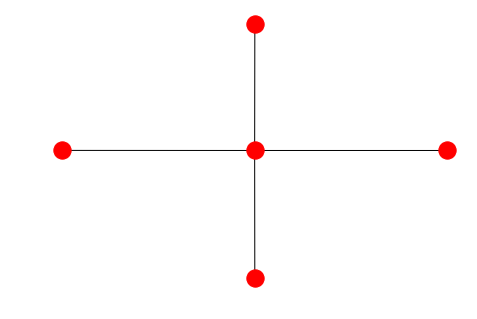

In [4]:
g.show()

### Write a graph into GraphML file


Now you may want to write your graph into a GraphML file. This is a
way::

In [5]:
# Create graph

g = Graph()

n1 = g.add_node("A")
n2 = g.add_node("B")
n3 = g.add_node("C")
n4 = g.add_node("D")
n5 = g.add_node("E")

g.add_edge(n1, n3)
g.add_edge(n2, n3)
g.add_edge(n3, n4)
g.add_edge(n3, n5)

fname = tempfile.mktemp()
parser = GraphMLParser()
parser.write(g, fname)

In [6]:
# Visualize the GraphML file

with open(fname) as f:
    print(f.read())

<?xml version="1.0" ?>
<graphml>
    <key attr.name="label" attr.type="string" id="label"/>
    <graph edgedefault="directed" id="">
        <node id="A"/>
        <node id="B"/>
        <node id="C"/>
        <node id="D"/>
        <node id="E"/>
        <edge directed="false" source="A" target="C"/>
        <edge directed="false" source="B" target="C"/>
        <edge directed="false" source="C" target="D"/>
        <edge directed="false" source="C" target="E"/>
    </graph>
</graphml>



### Read a graph from GraphML file

Now let's learn how to read a graph from a GraphML file. We will take the previous generated GraphML file, load it in Python and display it with NetworkX:

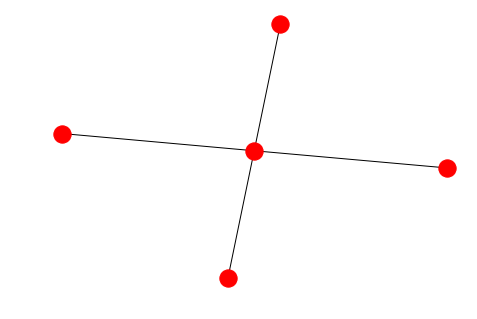

In [7]:
parser = GraphMLParser()
g = parser.parse(fname)

g.show()

### Nodes and edges attributes management

GraphML format has a flexible attributes management as PyGraphML. To add an attribute to a node or an item, simply use Python power:

In [8]:
g = Graph()
n = g.add_node('label')

# Add attribute
n['color'] = 'red'

# Read attribute
print(n['color'])

red


All attributes will be copied in GraphML file. As well when you read a GraphML file, attributes are available by the same way.